In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
LR=linear_model.LinearRegression()
groundtemp=df[["Ground Temperature"]]
chirps_sec=df["Chirps/Second"]
LR.fit(groundtemp,chirps_sec)

LinearRegression()

In [ ]:
print(f"Linear Regression Equation:y = {LR.coef_[0]:.4f}* x + {LR.intercept_:.4f}")

Linear Regression Equation:y = 0.2030* x + 0.4593


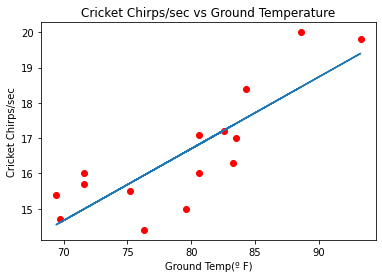

In [ ]:
plt.scatter(groundtemp,chirps_sec,color='r')
plt.plot(groundtemp,LR.predict(groundtemp))
plt.title("Cricket Chirps/sec vs Ground Temperature")
plt.xlabel("Ground Temp(º F)")
plt.ylabel("Cricket Chirps/sec")
plt.show()


In [ ]:
print("R^2 of this equation :{:.4f}".format(LR.score(groundtemp,chirps_sec)))

R^2 of this equation :0.6923


since R^2 value is below 0.8 model is not good fit for the data

In [ ]:
#If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
print("At 95 .F the chirps/sec would be  {:.4f}".format(LR.predict([[95]])[0]))

At 95 .F the chirps/sec would be  19.7443


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


y=m*x+c

(y-c)=m*x

x=(y-c)/m

In [ ]:
def chirps_to_temp(y):
  res=(y-LR.intercept_)/LR.coef_[0]
  print("With the observation of {} chirps/sec, we expect the ground temp of {:.2f}˚F".format(y,res))

In [ ]:
chirps_to_temp(18)

With the observation of 18 chirps/sec, we expect the ground temp of 86.41˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from google.colab import files
files.upload()

Saving salary.txt to salary.txt


{'salary.txt': b'       0    3    25    1    35    36350\r\n       0    3    13    1    22    35350\r\n       0    3    10    1    23    28200\r\n       1    3     7    1    27    26775\r\n       0    3    19    0    30    33696\r\n       0    3    16    1    21    28516\r\n       1    3     0    0    32    24900\r\n       0    3    16    1    18    31909\r\n       0    3    13    0    30    31850\r\n       0    3    13    0    31    32850\r\n       0    3    12    1    22    27025\r\n       0    2    15    1    19    24750\r\n       0    3     9    1    17    28200\r\n       0    2     9    0    27    23712\r\n       0    3     9    1    24    25748\r\n       0    3     7    1    15    29342\r\n       0    3    13    1    20    31114\r\n       0    2    11    0    14    24742\r\n       0    2    10    0    15    22906\r\n       0    3     6    0    21    24450\r\n       0    1    16    0    23    19175\r\n       0    2     8    0    31    20525\r\n       0    3     7    1    13    279

In [ ]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
LR_bb=linear_model.LinearRegression()
brain=df['Brain']
body=df[['Body']]
LR_bb.fit(body,brain)


LinearRegression()

In [ ]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(LR_bb.coef_[0], LR_bb.intercept_))

Linear Regression Equation: y = 0.9029 * x + -56.8555


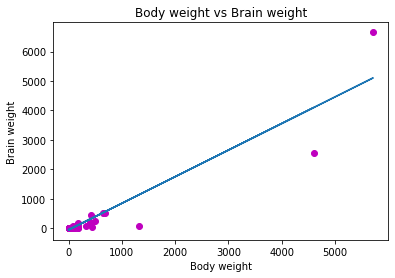

In [ ]:
plt.scatter(body,brain,color='m')
plt.plot(body,LR_bb.predict(body))
plt.title("Body weight vs Brain weight")
plt.xlabel("Body weight")
plt.ylabel("Brain weight")
plt.show()

In [ ]:
print("R^2 value of model is {:.4f}".format(LR_bb.score(body,brain)))

R^2 value of model is 0.8727


This score is greater than 0.8, so it is a good fit for this data.

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
independent_cols=["Sex", "Rank", "Year", "Degree", "YSdeg"]

In [ ]:
x=df[independent_cols]
y=df["Salary"]
LR_sd=linear_model.LinearRegression()
LR_sd.fit(x,y)

LinearRegression()

In [ ]:
print("The Multiple Linear Regression Equation with features {}  is y= {}* x + {} ".format(",".join(independent_cols),LR_sd.coef_,LR_sd.intercept_))

The Multiple Linear Regression Equation with features Sex,Rank,Year,Degree,YSdeg  is y= [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]* x + 11410.14654725559 


In [ ]:
def findR2value(independent_cols,df,output=y):
  feature_colval=df[independent_cols]
  LR_sd=linear_model.LinearRegression()
  LR_sd.fit(feature_colval,y)
  return LR_sd.score(feature_colval,y)



In [ ]:
print('R^2 score for equation using all columns: {}'.format(findR2value(independent_cols,df)))

R^2 score for equation using all columns: 0.8547180674410969


In [ ]:
from itertools import combinations as itc

In [ ]:
def getcombos(col):
  return [itc(col,i+1) for i in range(len(col))]

In [ ]:
combos=getcombos(independent_cols)
#print(list(combos))

In [ ]:
def all_combo_scores(combos, df):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[findR2value(list(n), df)] = n
    return combo_scores

In [ ]:
combo_scores= all_combo_scores(combos,df)
sorted(combo_scores.items(),key=lambda c:c[0],reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485598, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443395, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

**The selection with the best  score is: Sex, Rank, Year, Degree, YSdeg: 0.85471806744109691 (as seen above)**

**It is worth noting that Sex on its own has a score very close to zero (0.063898925832880038), indicating that it has no direct influence on salary.**

In [ ]:
numbers_by_sex = df.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(numbers_by_sex[0], numbers_by_sex[1]))

Num men: 38
Num women: 14


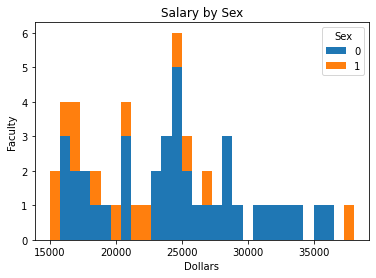

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Salary').plot(kind='hist', stacked=True, bins=30, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

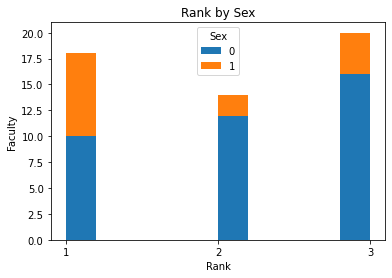

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Rank').plot(kind='hist', stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

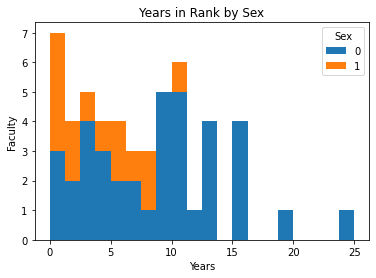

In [ ]:
df.pivot_table(index=df.index, columns='Sex', values='Year').plot(kind='hist', stacked=True, bins=20,title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()